#Python Pandas Sales Analysis
######by Tafadzwa Mary-Anne Chigwada




## Analysis Questions 
1. What was the best and worst month for sales? How much was earned that month?
2. Which Top 5 US Cities had the highest number Of Sales?
3. What time should we display advertisements to maximize likelihood of customers buying products?
4. Which Pair Of Products are most often sold together?
5. Which 5 products sold the most? Why do you think it sold the most?


## Summary And Conclusion
Insights :
- December was the best months for sales with a total of 4,613,443.34 earned.
- January was the worst month for sales with a total of 1,822,256.73 earned.


- The Top 5 Cities with the most products sold are:
      1. San Franciso, CA
      2. Los Angeles, CA
      3. New York City, NY
      4. Boston, MA
      5. Atlanta, GA

- The peak Order Times are between 11am, 12pm and 7pm. Therefore these are the best times to advertize to maximize Purchase likelihood

- The iPhone and Lightning Charging Cable the most sold pair of products with 1005 sales

- The TOp 5 most selling products are;
      1. AAA Batteries (4-pack) with 31017 sales
      2. AA Batteries (4-pack) with 27635 sales
      3. USB-C Charging Cable with 23975 sales
      4. Lightning Charging Cable with 23217 sales
      5. Wired Headphones with 20557 sales
      - this trend is evidenced by the overlaid graph showing that, these products had the most sales because of the affordable price/
  



#Data Preparation And Cleaning

    Importing necessary files
    Merging the csv files into one csv file
    Converting data to appropriate data types
    Fix missing or incorrect values


In [187]:
#importing necessary files
import pandas as pd
import matplotlib.pyplot as plt


from itertools import combinations
from collections import Counter


#provides functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc.
#It allows you to interact with the file system, for example, to create, rename, or delete files and directories, as well as to navigate the file system hierarchy.
import os

#allowing google colab to access google drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
#listing the files to merge
files = [file for file in os.listdir('/content/drive/MyDrive/Data Analysis projects/Sales Analysis Pandas/Sales_Data')]

for file in files :
  print(file)

Sales_April_2019.csv
Sales_March_2019.csv
Sales_December_2019.csv
Sales_October_2019.csv
Sales_July_2019.csv
Sales_November_2019.csv
Sales_February_2019.csv
Sales_August_2019.csv
Sales_September_2019.csv
Sales_May_2019.csv
Sales_June_2019.csv
Sales_January_2019.csv


In [64]:
#Merging numerous sales data into a single csv file
#this makes it easier to do more yearly analysis

#creates an empty dataframe for all the months
all_months_data = []

#lists the path to all the csv files desired
path = '/content/drive/MyDrive/Data Analysis projects/Sales Analysis Pandas/Sales_Data/'


for file in os.listdir(path): # iterates through the filenames in the path specified. ie: Sales_April_2019.csv, Sales_March_2019.csv etc.
  if file.endswith('.csv'): #checks if filename ends with .csv tp avoid errors

      #adds the path of the file to the filename to get a full file path. ie: '/content/drive/MyDrive/Data Analysis projects/Sales Analysis Pandas/Sales_Data/Sales_April_2019.csv'
        all_months_data.append(pd.read_csv(os.path.join(path, file)))
#concatenates all the files specified in the full path.
#rows of file 1 appear first, followed by rows of file 2 etc
#saves the concationation of all the files to the all_months_data variable
all_months_data = pd.concat(all_months_data)

#So, in summary, this line of code writes the contents of the all_months_data DataFrame to a CSV file named 'combined.csv' in the current working directory.
all_months_data.to_csv('all_data.csv', index=False)

    
    


In [65]:
#read In updated dataframe
all_data = pd.read_csv("all_data.csv")

In [66]:
#Sum of missing values per column
#all_data.isna().sum()

#Replacing NaN/ missing values with 0
all_data.dropna(axis=0, how='all', inplace=True)


In [67]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


#Exploratory Analysis

####Augmenting Data With Additional Columns

Part 1: What was the best and worst month for sales? How much was earned that month?

In [69]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [80]:
#adding month column by taking the first two didgits from the Order Date column
all_data["Month"] = all_data['Order Date'].str[0:2]

#Removes rows with Month values equal to Or which came about whilst splitting the month from the Order Date column
all_data = all_data[all_data["Month"].str[0:2] != 'Or']

In [84]:
#converting columns to correct data type

all_data["Month"] = pd.to_numeric(all_data["Month"]) #Makes integer

all_data["Price Each"] = pd.to_numeric(all_data["Price Each"]) #Makes float

all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"]) #Makes integer

In [89]:
#Creates sales column (Quantity * Price Each)
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

In [ ]:
#Groups the sum of sales by months and sorts in descending order of sales
all_data.groupby("Month").sum().sort_values(by="Sales", ascending=False)

<function matplotlib.pyplot.show(*args, **kw)>

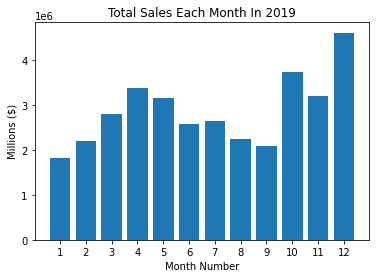

In [227]:
#Visualizing The Total sales
results = all_data.groupby("Month").sum()
months = range(1,13)


plt.bar(months, results["Sales"]) #plotting a bar chart with months on x, sales on y

plt.xlabel('Month Number') # update x-axis label
plt.ylabel('Millions ($)') # update y-axis label
plt.title("Total Sales Each Month In 2019") #update title
plt.xticks(months)

plt.show




December was the best month whilst January was the worst month

##Part 2: Which 5 US Cities sold the most products?

In [ ]:
#Augmenting a city column from the Purchase Address column using apply and lambda function
#NB: In this context, index refers to words

def get_state(address) : # this function returns the state in which the city is in, so as to specify which city
  return address.split(',')[2].split(" ")[1] #returns the 2nd index after the comma, which is the state and zip code. Further split between state and zip code, using the first index after the whitespace ie: zip code

all_data["City"] = all_data["Purchase Address"].apply(lambda x: x.split(',')[1] + ", " + get_state(x)) #the function splits the string at the first sentence and returns the value at the 1st index

all_data.head()

In [168]:
#grouping cities by most product sales
all_data.groupby("City").sum().sort_values(by="Sales", ascending=False)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"San Francisco, CA",50239,8211461.74,315520,8262203.91
"Los Angeles, CA",33289,5421435.23,208325,5452570.80
"New York City, NY",27932,4635370.83,175741,4664317.43
"Boston, MA",22528,3637409.77,141112,3661642.01
"Atlanta, GA",16602,2779908.20,104794,2795498.58
"Dallas, TX",16730,2752627.82,104620,2767975.40
"Seattle, WA",16553,2733296.01,104941,2747755.48
"Portland, OR",11303,1860558.22,70621,1870732.34
"Austin, TX",11153,1809873.61,69829,1819581.75


<function matplotlib.pyplot.show(*args, **kw)>

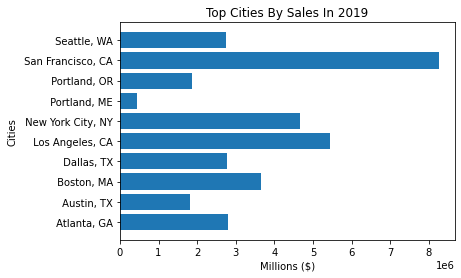

In [229]:
#Visualizing The Total sales
results = all_data.groupby("City").sum()

cities = [city for city, df in all_data.groupby('City')]

plt.barh(cities, results["Sales"]) #plotting a horizontal bar chart with sales on x, cities on y

plt.xlabel('Millions ($)') # update x-axis label
plt.ylabel('Cities' ) # update y-axis label
plt.title("Top Cities By Sales In 2019") #update title
plt.yticks(cities, rotation=360)

plt.show






The Top 5 Cities with the most Sales are as follows;
1. San Francisco, CA
2. Los Angeles, CA
3. New York City, NY
4. Boston, MA
5. Atlanta, GA

##Part 3: What time should we display advertisements to maximize likelihood of customers buying products?


In [179]:
#converts the Order Hour column to date and time format
all_data['Order Date'] = pd.to_datetime(all_data["Order Date"])

In [ ]:
#extracting the hour from the start time
all_data["Hour Of Purchase"] = all_data['Order Date'].dt.hour
all_data.head()

<function matplotlib.pyplot.show(*args, **kw)>

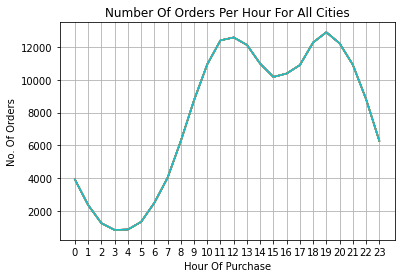

In [182]:
#Visualizing The Number Of Times the Order Hour appears
hours = [hour for hour, df in all_data.groupby("Hour Of Purchase")]

plt.plot(hours, all_data.groupby(["Hour Of Purchase"]).count())
plt.grid()
plt.xticks(hours)
plt.xlabel('Hour Of Purchase') # update x-axis label
plt.ylabel('No. Of Orders' ) # update y-axis label
plt.title("Number Of Orders Per Hour For All Cities") #update title
plt.show


According to this visualization,the best time to advertize would be between 11am and 12pm and at 7pm

#Part 4: What Products are most often sold together?
######Selling Of products together is based off the Order ID, products with the same order ID are most likely sold together

In [ ]:
all_data.head()

In [ ]:
#Know which rows have duplicate values
#Create a new dataframe
duplicates = all_data[all_data["Order ID"].duplicated(keep=False)] #checks for duplocated values in all cells in Order ID column
duplicates.head(20)

In [186]:
#grouping products with same ID into one cell
duplicates['Grouped'] = duplicates.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))

#drops duplicates of grouped items
duplicates = duplicates[["Order ID", "Grouped"]].drop_duplicates()
duplicates.head()

<ipython-input-186-22e03e35cb3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates['Grouped'] = duplicates.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [ ]:
#counting the number of occurencies of oairs in order to find which products are sold together the most
# libraries Used; 
#from itertools import combinations
#from collections import Counter

In [191]:
#Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

count = Counter()
for row in duplicates["Grouped"]:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
  print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Part 5: What product sold the most? Why do you think it sold the most?

In [226]:
#Grouping the dataset by the Products and summing how many times each product was ordered
product_grouping = all_data.groupby("Product").sum().sort_values(by="Quantity Ordered", ascending=False)
product_grouping.head(5)

,Quantity Ordered,Price Each,Month,Sales,Time,Hour Of Purchase
Product,,,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,297332
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,298342
USB-C Charging Cable,23975,261740.85,154819,286501.25,314645,314645
Lightning Charging Cable,23217,323787.10,153092,347094.15,312529,312529
Wired Headphones,20557,226395.18,133397,246478.43,271720,271720


Text(0.5, 1.0, 'Quantity Of Products Ordered')

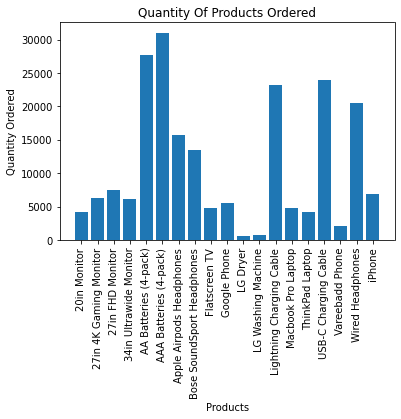

In [219]:
#Visualizing 
product_grouping = all_data.groupby("Product")

quantity_ordered = product_grouping.sum()['Quantity Ordered']
products = [product for product, df in product_grouping]
plt.bar(products, quantity_ordered)

plt.xticks(products, rotation=90)
plt.xlabel('Products') # update x-axis label
plt.ylabel('Quantity Ordered') # update y-axis label
plt.title("Quantity Of Products Ordered") #update title


This visualization shows that the top 5 most purchased products are;
1. AAA Batteries (4-pack) 
2. AA Batteries (4-pack) 
3. USB-C Charging Cable 
4. Lightning Charging Cable 	
5. Wired Headphones

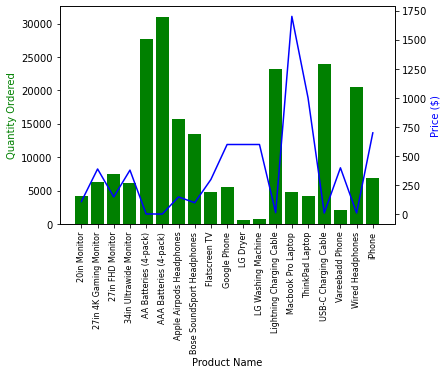

In [225]:
prices = all_data.groupby("Product").mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='green')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)


plt.show()

This visualization confirms the reason behind the top 5 most purchased products being that they are listed at an affordable price.